Check out the following properties of pandas DataFrame
- .head(4) to show first four rows
- .info to check information in data
- .select_dtypes(exclude=[np.number]).columns to select non-numeric columns
- .get_dummies() to convert categorical variables to dummy variables. Remember to add prefix and drop_first argument
- pd.concat()
- pd.merge()
- .drop
- .corr()
- .astype()
- .apply()  to apply a user defined function to element of a column 

In [46]:
import pandas as pd
A = pd.DataFrame({'a1': ['g', 'g', 'd', 'd', 'e', 'e'], 'a2':[1,2,3,4,5, 6],\
                   'a3':['trt', 'control', 'trt', 'control', 'trt', 'control']})
print(A)
#print(A['a1'])


  a1  a2       a3
0  g   1      trt
1  g   2  control
2  d   3      trt
3  d   4  control
4  e   5      trt
5  e   6  control


In [6]:
A.info

<bound method DataFrame.info of   a1  a2       a3
0  g   1      trt
1  g   2  control
2  d   3      trt
3  d   4  control
4  e   5      trt
5  e   6  control>

In [32]:
import numpy as np
A.select_dtypes(exclude=[np.number]).columns 

Index(['a1', 'a3'], dtype='object')

Convert categorical variable a1 and a3 to numerical values

In [9]:
print(pd.get_dummies(A['a1'], prefix = 'a1'))

    a1_d   a1_e   a1_g
0  False  False   True
1  False  False   True
2   True  False  False
3   True  False  False
4  False   True  False
5  False   True  False


In [47]:

a1_1 = pd.get_dummies(A['a1'], prefix = 'a1').astype('int')
print(a1_1)
print(a1_1.corr())


   a1_d  a1_e  a1_g
0     0     0     1
1     0     0     1
2     1     0     0
3     1     0     0
4     0     1     0
5     0     1     0
      a1_d  a1_e  a1_g
a1_d   1.0  -0.5  -0.5
a1_e  -0.5   1.0  -0.5
a1_g  -0.5  -0.5   1.0


In [48]:
a3_1 = pd.get_dummies(A['a3'], prefix = 'a3').astype('int')
print(a3_1)
print(a3_1.corr())

   a3_control  a3_trt
0           0       1
1           1       0
2           0       1
3           1       0
4           0       1
5           1       0
            a3_control  a3_trt
a3_control         1.0    -1.0
a3_trt            -1.0     1.0


In [34]:
x=['a','b', 'c']*4
print(x)
temp = pd.Series(x)
#temp


['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c']


In [35]:
temp_1 = pd.get_dummies(temp).astype(int)
print(temp_1 )
temp_1.corr()

    a  b  c
0   1  0  0
1   0  1  0
2   0  0  1
3   1  0  0
4   0  1  0
5   0  0  1
6   1  0  0
7   0  1  0
8   0  0  1
9   1  0  0
10  0  1  0
11  0  0  1


,a,b,c
a,1.0,-0.5,-0.5
b,-0.5,1.0,-0.5
c,-0.5,-0.5,1.0


In [36]:
x=['a','b', 'c','e']*10
#print(x)
temp = pd.Series(x)
temp_1 = pd.get_dummies(temp).astype(int)
#print(temp_1 )
temp_1.corr()

,a,b,c,e
a,1.000000,-0.333333,-0.333333,-0.333333
b,-0.333333,1.000000,-0.333333,-0.333333
c,-0.333333,-0.333333,1.000000,-0.333333
e,-0.333333,-0.333333,-0.333333,1.000000


In [23]:
x=['a','b', 'c','e', 'f']*10
#print(x)
temp = pd.Series(x)
temp_1 = pd.get_dummies(temp).astype(int)
#print(temp_1 )
temp_1.corr()

,a,b,c,e,f
a,1.00,-0.25,-0.25,-0.25,-0.25
b,-0.25,1.00,-0.25,-0.25,-0.25
c,-0.25,-0.25,1.00,-0.25,-0.25
e,-0.25,-0.25,-0.25,1.00,-0.25
f,-0.25,-0.25,-0.25,-0.25,1.00


In [24]:
x=['a','b', 'c','e','f', 'g']*10
#print(x)
temp = pd.Series(x)
temp_1 = pd.get_dummies(temp).astype(int)
#print(temp_1 )
temp_1.corr()

,a,b,c,e,f,g
a,1.0,-0.2,-0.2,-0.2,-0.2,-0.2
b,-0.2,1.0,-0.2,-0.2,-0.2,-0.2
c,-0.2,-0.2,1.0,-0.2,-0.2,-0.2
e,-0.2,-0.2,-0.2,1.0,-0.2,-0.2
f,-0.2,-0.2,-0.2,-0.2,1.0,-0.2
g,-0.2,-0.2,-0.2,-0.2,-0.2,1.0


In [49]:
A = pd.concat([A, a1_1, a3_1], axis = 1)
print(A)

  a1  a2       a3  a1_d  a1_e  a1_g  a3_control  a3_trt
0  g   1      trt     0     0     1           0       1
1  g   2  control     0     0     1           1       0
2  d   3      trt     1     0     0           0       1
3  d   4  control     1     0     0           1       0
4  e   5      trt     0     1     0           0       1
5  e   6  control     0     1     0           1       0


In [50]:
A = A.drop(['a1', 'a3', 'a1_d', 'a3_control'], axis= 1)
print(A)
print(A.corr())

   a2  a1_e  a1_g  a3_trt
0   1     0     1       1
1   2     0     1       0
2   3     0     0       1
3   4     0     0       0
4   5     1     0       1
5   6     1     0       0
              a2      a1_e      a1_g   a3_trt
a2      1.000000  0.828079 -0.828079 -0.29277
a1_e    0.828079  1.000000 -0.500000  0.00000
a1_g   -0.828079 -0.500000  1.000000  0.00000
a3_trt -0.292770  0.000000  0.000000  1.00000


If the dimension of A is large, it is better to use heatmap to show the strongth of correlation.

<Axes: >

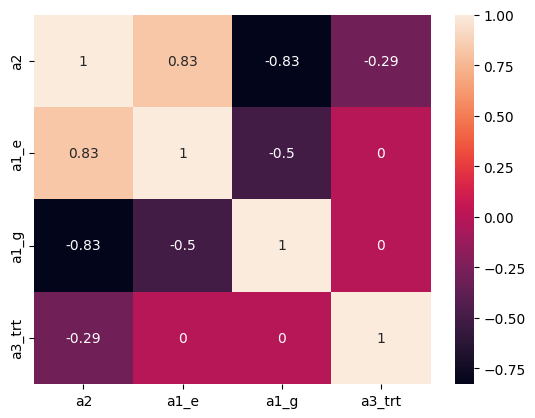

In [39]:
import seaborn as sn
sn.heatmap(A.corr(), annot=True)

- We created dummy variables for categorical variable a1. They are indicator variables. 
- When we declare X, we drop Weight_0, Marital_0, Gender_0, and Stress_0 to avoid multicollineary.
- The dummy varaiables may or MAY NOT be highly correlated. The number of unique values determine the strength of correlation. The more the number of unique values, the less correlated. 
- Generally, we remove one dummy variable (e.g., a1_d)  of each categorial variable. The one  being removed serves as the baseline for a1. (equivalent to contrast coding created by design.matrix in R)
- In earlier examples, we manually dropped one of the dummy variables. This could be done directly with drop_first argument in the .get_dummies command
pd.get_dummies(temp, prefix ='temp', drop_first=True)

               

In [59]:
A = pd.DataFrame({'a1': ['g', 'g', 'd', 'd', 'e', 'e'], 'a2':[1,2,3,4,5, 6],\
                   'a3':['trt', 'control', 'trt', 'control', 'trt', 'control']})
a1_a = pd.get_dummies(A['a1'], prefix ='a1', drop_first = True).astype('int')   
a3_a = pd.get_dummies(A['a3'], prefix ='a3', drop_first = True).astype('int')    
new_A = pd.concat([A.drop(['a1', 'a3'], axis=1), a1_a, a3_a], axis=1) 
print(new_A)

   a2  a1_e  a1_g  a3_trt
0   1     0     1       1
1   2     0     1       0
2   3     0     0       1
3   4     0     0       0
4   5     1     0       1
5   6     1     0       0


Note
Sometimes there are too many unique values in a categorical variable. In this case, sometimes we can convert the categorical variable's values to integers with LabelEncoder from sklearn.preprocessing. However, such created variable are not real numerical variable. Modeling with such created variable may be confusing. 

In [60]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder() 
label_encoder.fit_transform(A['a1']) 

array([2, 2, 0, 0, 1, 1])

In [51]:
# some simple numberical calculations can be done directly on pd DataFrame but some couldn't (such as log())
print(A['a2']*2.54)


0     2.54
1     5.08
2     7.62
3    10.16
4    12.70
5    15.24
Name: a2, dtype: float64


In [53]:
# x is a column from a pd DataFrame
def myfun(x):
    return np.log(x)

A['log_a2'] = A['a2'].apply(myfun)
print(A)

   a2  a1_e  a1_g  a3_trt    log_a2
0   1     0     1       1  0.000000
1   2     0     1       0  0.693147
2   3     0     0       1  1.098612
3   4     0     0       0  1.386294
4   5     1     0       1  1.609438
5   6     1     0       0  1.791759
